# Valorar opciones de compra

In [12]:
def getA(K, T, S, d, u):
    k = 0
    while True:
        if S*(1+u)^(k)*(1+d)^(T-k) > K:
            return k
        else:
            k += 1

In [13]:
getA(5,8,1,-0.1,0.3)

7

In [102]:
def getV(K, T, S, d, r, u):
    A = getA(K, T, S, d, u)
    q = (r-d)/(u-d)
    if r <= d or r >= u:
        #print("El mercado no es posible")
        return 0
    else:
        return (1+r)^(-T)*sum(binomial(T,v)*q^v*(1-q)^(T-v)*(S*(1+u)^(v)*(1+d)^(T-v)- K) for v in range(A,T))

In [54]:
getV(5,8,1,-0.5,0.2,0.7)

0.322548353653845

In [55]:
getV(5,8,1,-0.5,0.2,0.8)

0.407080698919061

Definimos los valores iniciales 

In [104]:
K = 7
T = 8 
S = 0.5
d = -0.4 
r = 0.1 
u = 0.8

In [69]:
def crearListaU(inicial, final, incremento):
    u = inicial
    puntos = []
    while u < final:
        valor = getV(5,8,1,-0.5,0.2, u)
        if valor in RR:
            puntos += [(u,getV(K, T, S, d, r, u))]
        u = u + incremento
        
    return puntos

In [72]:
puntos1 = crearListaU(0.1, 1.2, 0.02)

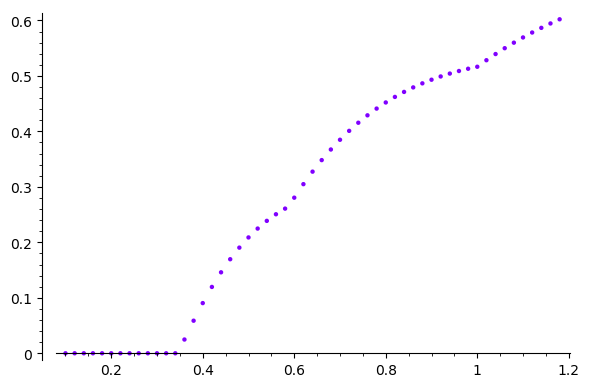

In [73]:
point(puntos1, rgbcolor=hue(0.75))

In [75]:
puntos2 = crearListaU(0.1, 1.2, 0.02)

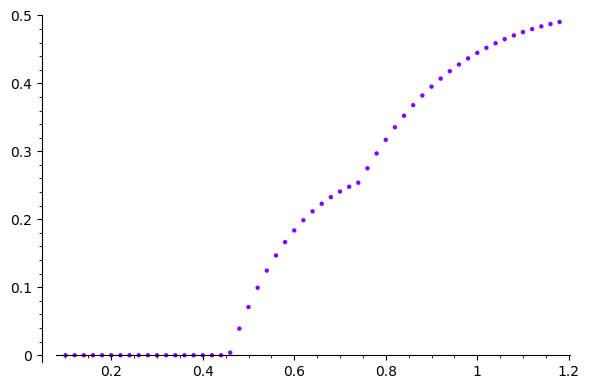

In [76]:
point(puntos2, rgbcolor=hue(0.75))

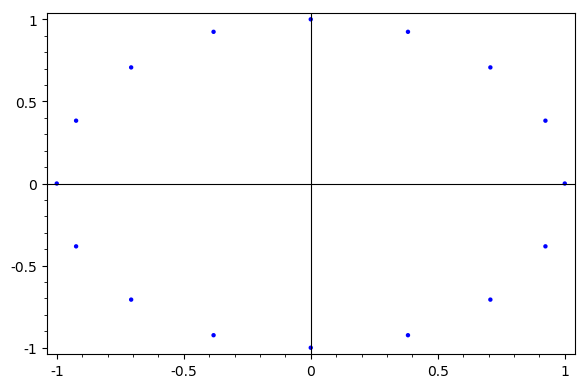

In [77]:
point([(cos(theta), sin(theta)) for theta in srange(0, 2*pi, pi/8)], frame=True)

In [84]:
p1 = point([(u, getV(K, T, S, d, r, u)) for u in srange(0.1, 1,0.02) ], rgbcolor=hue(0.75))

In [ ]:
p2 = point([(u, getV(2, T, S, d, r, u)) for u in srange(0.1, 1,0.02) ], rgbcolor = (1,0,0))

In [91]:
p3 = point([(u, getV(20, T, S, d, r, u)) for u in srange(0.1, 1,0.02) ], rgbcolor = (0,1,0))

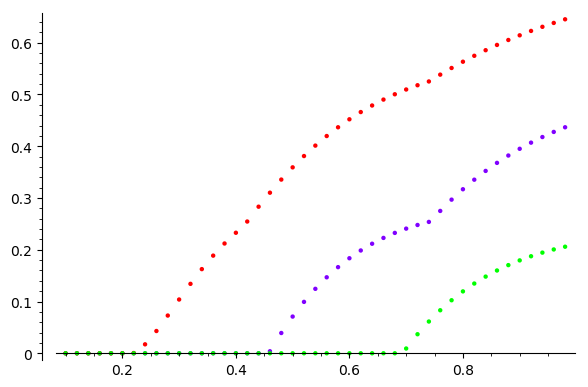

In [92]:
show(p1+p2+p3)

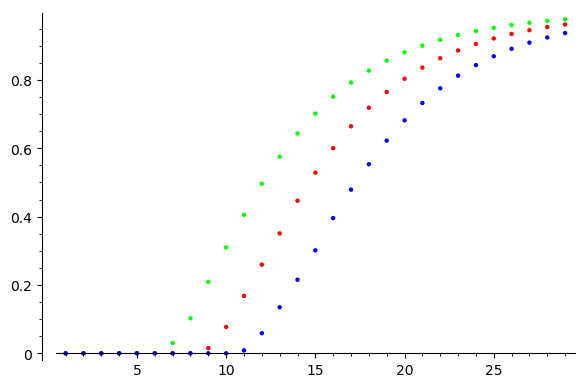

In [109]:
# point([(T, getV(K, T, S, d, r, u)) for T in srange(1,30, 1) ], rgbcolor = (1,0,0))
p1 = point([(T, getV(7, T, 1, -0.1, 0.2, 0.3)) for T in srange(1,30, 1) ], rgbcolor = (1,0,0))
p2 = point([(T, getV(4, T, 1, -0.1, 0.2, 0.3)) for T in srange(1,30, 1) ], rgbcolor = (0,1,0))
p3 = point([(T, getV(12, T, 1, -0.1, 0.2, 0.3)) for T in srange(1,30, 1) ], rgbcolor = (0,0,1))
show(p1+p2+p3)